## WORDCLOUD

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
#from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
#from bertopic import BERTopic

In [4]:
df=pd.read_csv('BA_reviews.csv')
df.head(5)

,Unnamed: 0,reviews
0,0,"Not Verified | Flew premium, only worth the e..."
1,1,✅ Trip Verified | First our morning flight wa...
2,2,✅ Trip Verified | Although it was a bit uncom...
3,3,✅ Trip Verified | Boarding was decently organ...
4,4,✅ Trip Verified | Boarding on time and departu...


In [5]:
df.dtypes

Unnamed: 0     int64
reviews       object
dtype: object

In [6]:
df.shape

(1000, 2)

In [7]:
#remove NaN

df=df.dropna(how='all')

df.shape

(1000, 2)

In [8]:
df['reviews']=df['reviews'].astype(str).str.split("|")
df.head(5)

,Unnamed: 0,reviews
0,0,"[Not Verified , Flew premium, only worth the..."
1,1,"[✅ Trip Verified , First our morning flight ..."
2,2,"[✅ Trip Verified , Although it was a bit unc..."
3,3,"[✅ Trip Verified , Boarding was decently org..."
4,4,"[✅ Trip Verified , Boarding on time and depar..."


In [9]:
df['reviews']=df['reviews'].str[1]
df.head(5)

,Unnamed: 0,reviews
0,0,"Flew premium, only worth the extra money for..."
1,1,First our morning flight was cancelled and m...
2,2,Although it was a bit uncomfortable flight i...
3,3,Boarding was decently organised. The A380 st...
4,4,Boarding on time and departure on time for a ...


In [10]:
#remove puntuaction

df['reviews'].map(lambda x: re.sub('[,\.!?]', '', x))



0        Flew premium only worth the extra money for ...
1        First our morning flight was cancelled and m...
2        Although it was a bit uncomfortable flight i...
3        Boarding was decently organised The A380 sti...
4       Boarding on time and departure on time for a ...
                             ...                        
995     Took a day trip to Vienna with British Airway...
996      Glasgow to Heathrow BA are a disgrace it onc...
997      London to Phoenix this week Having a window ...
998      Glasgow to Heathrow Very disappointed in Bri...
999      Brussels to Shanghai via London Heathrow All...
Name: reviews, Length: 1000, dtype: object

In [11]:
#remove puntuaction

#df['reviews'].map(lambda x: re.sub('[,\.!?]', '', x))

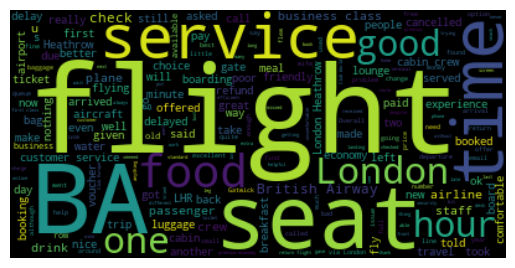

In [12]:
# Start with one review:
text = " ".join(review for review in df.reviews)
stop_words = list(STOPWORDS)
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords = stop_words).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

## SENTIMENT ANALYSIS

In [13]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SentimentAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vaner\AppData\Roaming\nltk_data...


True

In [21]:
import re
df['reviews'].map(lambda x: re.sub('[,\.!?]', '', x))

0        Flew premium only worth the extra money for ...
1        First our morning flight was cancelled and m...
2        Although it was a bit uncomfortable flight i...
3        Boarding was decently organised The A380 sti...
4       Boarding on time and departure on time for a ...
                             ...                        
995     Took a day trip to Vienna with British Airway...
996      Glasgow to Heathrow BA are a disgrace it onc...
997      London to Phoenix this week Having a window ...
998      Glasgow to Heathrow Very disappointed in Bri...
999      Brussels to Shanghai via London Heathrow All...
Name: reviews, Length: 1000, dtype: object

In [18]:
sa=SentimentAnalyzer()

In [22]:
def get_sentiment(text):
    analyzer = sa
    scores = analyzer.polarity_scores(text)
    return scores

def analyze_and_save_sentiment(df):
    df['sentiment'] = df['reviews'].apply(get_sentiment)
    df['overall_sentiment'] = df['sentiment'].apply(lambda x: x['compound'])
    return df

In [23]:
df1=analyze_and_save_sentiment(df)
df1

,Unnamed: 0,reviews,sentiment,overall_sentiment
0,0,"Flew premium, only worth the extra money for...","{'neg': 0.105, 'neu': 0.774, 'pos': 0.122, 'co...",0.4985
1,1,First our morning flight was cancelled and m...,"{'neg': 0.092, 'neu': 0.874, 'pos': 0.034, 'co...",-0.7960
2,2,Although it was a bit uncomfortable flight i...,"{'neg': 0.067, 'neu': 0.751, 'pos': 0.181, 'co...",0.6597
3,3,Boarding was decently organised. The A380 st...,"{'neg': 0.104, 'neu': 0.747, 'pos': 0.149, 'co...",0.7104
4,4,Boarding on time and departure on time for a ...,"{'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'comp...",0.8895
...,...,...,...,...
995,995,Took a day trip to Vienna with British Airway...,"{'neg': 0.061, 'neu': 0.874, 'pos': 0.066, 'co...",0.4325
996,996,"Glasgow to Heathrow. BA are a disgrace, it o...","{'neg': 0.244, 'neu': 0.74, 'pos': 0.016, 'com...",-0.9615
997,997,London to Phoenix this week. Having a window...,"{'neg': 0.09, 'neu': 0.704, 'pos': 0.206, 'com...",0.9094
998,998,Glasgow to Heathrow. Very disappointed in Br...,"{'neg': 0.076, 'neu': 0.851, 'pos': 0.073, 'co...",0.1714


In [24]:
pos=df1['overall_sentiment'].apply(lambda x: x>0).sum()
neg=df1['overall_sentiment'].apply(lambda x: x<0).sum()

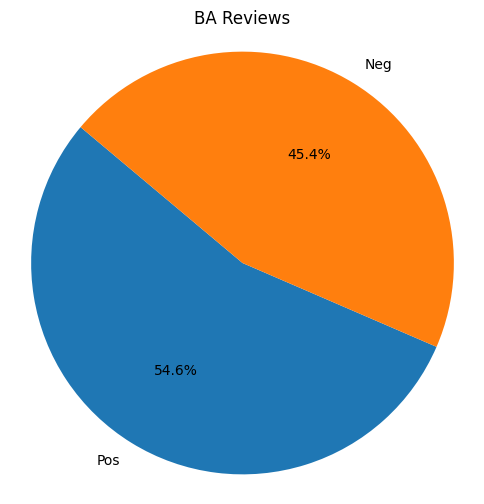

In [26]:
import matplotlib.pyplot as plt

# Sample data
labels = ['Pos', 'Neg']
sizes = [pos,neg]  # Values or sizes of each category

# Create a pie chart
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('BA Reviews')

# Show the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## LDA

In [17]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = df.reviews
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])




13

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['flew', 'premium', 'worth', 'extra', 'money', 'bit', 'extra', 'room', 'penny', 'pinching', 'means', 'benefit', 'one', 'drink', 'service', 'hour', 'flight', 'fizz', 'offered', 'take', 'poor', 'food', 'boarding', 'badly', 'organised', 'food', 'left', 'tables', 'min', 'landing']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


13

In [18]:
#LDA model training

from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.015*"ba" + 0.014*"business" + 0.012*"class" + 0.012*"seat" + '
  '0.011*"flight" + 0.009*"service" + 0.008*"time" + 0.007*"hours" + '
  '0.007*"london" + 0.007*"seats"'),
 (1,
  '0.019*"flight" + 0.012*"service" + 0.010*"ba" + 0.009*"cabin" + '
  '0.008*"london" + 0.008*"british" + 0.007*"crew" + 0.007*"good" + '
  '0.006*"airways" + 0.006*"heathrow"'),
 (2,
  '0.018*"ba" + 0.017*"flight" + 0.010*"london" + 0.009*"food" + '
  '0.008*"service" + 0.006*"crew" + 0.006*"cabin" + 0.006*"staff" + '
  '0.006*"would" + 0.005*"seats"'),
 (3,
  '0.021*"flight" + 0.019*"ba" + 0.009*"service" + 0.009*"one" + '
  '0.007*"london" + 0.007*"seats" + 0.007*"class" + 0.006*"time" + '
  '0.006*"cabin" + 0.006*"business"'),
 (4,
  '0.015*"flight" + 0.014*"ba" + 0.012*"cabin" + 0.010*"good" + 0.010*"staff" '
  '+ 0.009*"service" + 0.009*"london" + 0.008*"time" + 0.008*"crew" + '
  '0.007*"food"'),
 (5,
  '0.024*"flight" + 0.013*"ba" + 0.010*"service" + 0.010*"crew" + '
  '0.009*"london" + 0.008*"

In [19]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [20]:
cd '/content/drive'

[Errno 2] No such file or directory: '/content/drive'
/content


In [ ]:
#!pip install pyLDAvis

In [22]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
import os


# Visualize the topics
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis



/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.004279 -0.007956       1        1  26.929717
6      0.017469  0.009875       2        1  20.312964
3      0.016123  0.012296       3        1  12.349664
9      0.014190 -0.005146       4        1   9.710273
4     -0.006671 -0.027179       5        1   8.045927
2      0.003056 -0.004351       6        1   5.912114
1      0.002199 -0.033699       7        1   5.251802
0     -0.022276  0.021333       8        1   4.996010
7      0.020818  0.026151       9        1   4.983878
8     -0.049187  0.008677      10        1   1.507651, topic_info=           Term         Freq        Total Category  logprob  loglift
19       flight  1690.000000  1690.000000  Default  30.0000  30.0000
179          ba  1124.000000  1124.000000  Default  29.0000  29.0000
459        good   397.000000   397.000000  Default  28.0000  28.0000
240        seat   509.000000   509.000000  Default  27.0000  27.0000
161    business   357.000000   357.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
108       could     3.342693   242.081138  Topic10  -5.8164  -0.0879
68   experience     3.096134   211.584169  Topic10  -5.8930  -0.0299
112        nice     2.648147   127.967419  Topic10  -6.0493   0.3167
70      flights     2.946748   241.627548  Topic10  -5.9424  -0.2121
26         like     2.755157   176.363394  Topic10  -6.0097   0.0355

[827 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
789       3  0.762930  abandoned
5149      1  0.084041        abu
5149      2  0.504245        abu
5149      4  0.084041        abu
5149      7  0.084041        abu
...     ...       ...        ...
1784      1  0.291150    wrapper
1784      8  0.291150    wrapper
5338      2  0.696566         yr
1036      6  0.655786        yvr
3062      5  0.713333        zrh

[1986 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 7, 4, 10, 5, 3, 2, 1, 8, 9])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [23]:
pyLDAvis.prepared_data_to_html(vis)

'\n<link rel="stylesheet" type="text/css" href="https://cdn.jsdelivr.net/gh/bmabey/pyLDAvis@3.4.0/pyLDAvis/js/ldavis.v1.0.0.css">\n\n\n<div id="ldavis_el11951399355179988802232164566" style="background-color:white;"></div>\n<script type="text/javascript">\n\nvar ldavis_el11951399355179988802232164566_data = {"mdsDat": {"x": [0.004279347970765774, 0.017469153191133797, 0.016122535339823114, 0.014190218113090883, -0.006671120475860909, 0.003055681282722198, 0.002199037430187626, -0.022276161318844558, 0.02081786126417922, -0.049186552797197226], "y": [-0.007955617277252887, 0.009875120852344994, 0.012295662057037662, -0.00514626644946333, -0.02717947840808127, -0.004351216658568393, -0.03369945602116469, 0.021332687622868954, 0.02615144210406533, 0.008677122178213509], "topics": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], "cluster": [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], "Freq": [26.929716805697012, 20.312964445848614, 12.34966437084713, 9.710273313716883, 8.045926525232847, 5.912114099120404, 5.251802264

In [24]:
pyLDAvis.save_html(vis,'lda.html')